In [149]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [150]:
#read dataset
ds1=pd.read_csv(r"C:\Users\Dell\Downloads\application_data.csv")
ds1.shape

(307511, 122)

In [151]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [152]:
ds1.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [153]:
ds1.shape

(307511, 122)

In [154]:
z=len(ds1)//2
z

153755

In [155]:
ds1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [156]:
#coloumns containg more than 50% Null value
ds1.columns[ds1.isnull().sum() < z]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [157]:
len(ds1.columns[ds1.isnull().sum() < z])

81

In [158]:
ds1=ds1[ds1.columns[ds1.isnull().sum() < z]]
ds1.shape

(307511, 81)

In [159]:
ds1.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
null_1=ds1.isnull().sum()/len(ds1)*100
null_1

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 81, dtype: int64

In [16]:
#Occupation_Type imputation

In [17]:
ds1['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

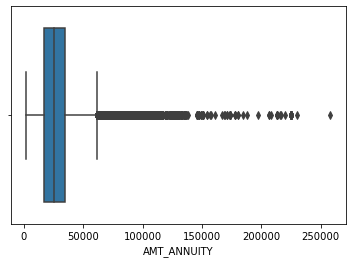

In [18]:
###Finding outliers in AMT_ANNUITY Column.
sns.boxplot(ds1['AMT_ANNUITY'])
plt.show

In [19]:
#AMT_ANNUITY column has outliers so we can impute using the median of column.

In [20]:
rep_null=ds1['AMT_ANNUITY'].median()

ds1.loc[ds1['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=rep_null

In [21]:
rep_null=ds1.isnull().sum()/len(ds1)*100
rep_null

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [22]:
ds1.AMT_ANNUITY.isnull().sum()

0

In [23]:
#finding catagorical column having 'XNA' value.

ds1[ds1['CODE_GENDER']=='XNA'].shape

(4, 81)

In [89]:
# For Organization column

ds1[ds1['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 82)

In [90]:
#there are 4 rows from Gender column and 55374 rows from Organization type column having XNA value

In [91]:
# check gender column for value count M&F
ds1['CODE_GENDER'].value_counts()

Female    202448
Male      105059
Name: CODE_GENDER, dtype: int64

In [92]:
#here, found XNA=4 so, we can drop gender XNA as it will no affect dataset.
ds1 = ds1[ds1['CODE_GENDER']!='XNA']
ds1['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)
ds1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,Male,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,25
307507,456252,0,Cash loans,Female,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,56
307508,456253,0,Cash loans,Female,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,41
307509,456254,1,Cash loans,Female,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,32


In [93]:
###Analysis of DAYS_BIRTH

In [94]:
abs(ds1['DAYS_BIRTH']).describe()

count    307507.000000
mean      16037.027271
std        4363.982424
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [95]:
#Creating column by name 'AGE_IN_YEARS'
ds1['AGE_IN_YEARS']=abs(ds1['DAYS_BIRTH'])//365

In [96]:
ds1['AGE_IN_YEARS'].describe()

count    307507.000000
mean         43.436055
std          11.954577
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE_IN_YEARS, dtype: float64

In [97]:
#here we can take desciption of data of ne coloumn added named 'AGE_IN_YEARS'

In [98]:
#Now,we are checking for imbalance in Target Variable of dataset
#Non-defalters=0 & Defaulters=1
#we will take title as (TARGET-Variable --- DEFAULTER Vs NONDEFAULTER)

In [99]:
trgt_ds1=ds1['TARGET'].value_counts(normalize=True)*100
trgt_ds1

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

In [100]:
##will check the same in pie-chart below

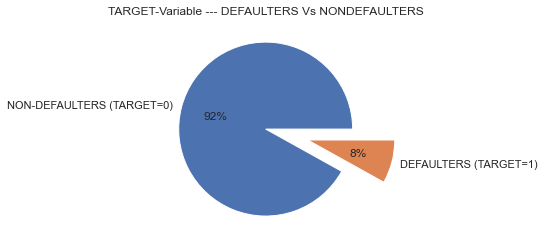

In [101]:
plt.pie(ds1['TARGET'].value_counts(normalize=True)*100, labels=['NON-DEFAULTERS (TARGET=0)','DEFAULTERS (TARGET=1)'],explode=(0,0.5),autopct='%1.f%%')
plt.title('TARGET-Variable --- DEFAULTERS Vs NONDEFAULTERS')
plt.show()

In [102]:
#now we can conclude that 92% people are no-defaulters & 8% people are defaulters,there is imbalance in data.

In [103]:
ds1.shape #1 column added 'AGE_IN_YEARS' hence, 81+1=82

(307507, 82)

In [104]:
ds1new0=ds1[ds1.TARGET==0]    #data related to non-defaulters
ds1new1=ds1[ds1.TARGET==1]    #data related to defaulters

In [105]:
### Univariate Analysis

def plotmax(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
    
    sns.countplot(x=var, data=ds1new0,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(ds1new0))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var, data=ds1new1,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percendstage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(ds1new1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

In [106]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 82 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307507 non-null  int64  
 1   TARGET                        307507 non-null  int64  
 2   NAME_CONTRACT_TYPE            307507 non-null  object 
 3   CODE_GENDER                   307507 non-null  object 
 4   FLAG_OWN_CAR                  307507 non-null  object 
 5   FLAG_OWN_REALTY               307507 non-null  object 
 6   CNT_CHILDREN                  307507 non-null  int64  
 7   AMT_INCOME_TOTAL              307507 non-null  float64
 8   AMT_CREDIT                    307507 non-null  float64
 9   AMT_ANNUITY                   307507 non-null  float64
 10  AMT_GOODS_PRICE               307229 non-null  float64
 11  NAME_TYPE_SUITE               306215 non-null  object 
 12  NAME_INCOME_TYPE              307507 non-nul

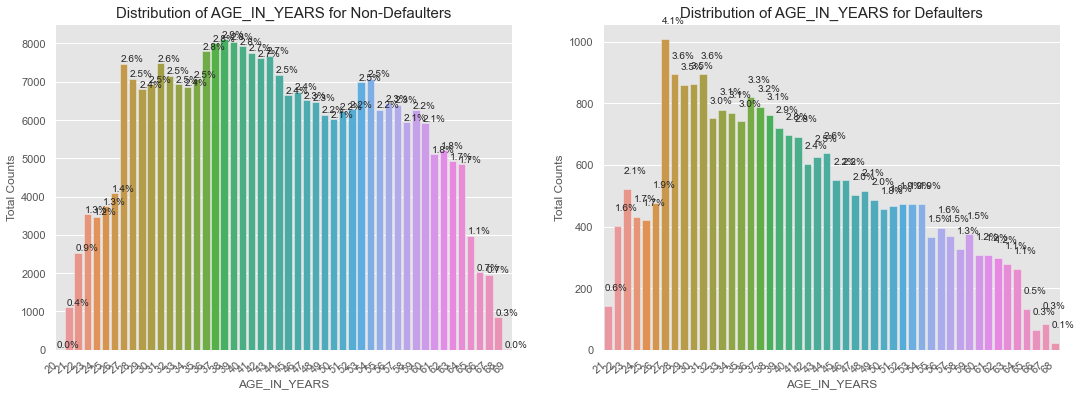

In [107]:
plotmax('AGE_IN_YEARS')

In [108]:
#here we can see, as per column of AGE_IN_YEARS, the weightage ofnon defaulters is much more b/w 28-60yrs.
#talking about defaulters block, risk is gradually decreasing as the increasing in age.
#we can provide loan to people fall under 28 to 50, for ease of clearing loan.

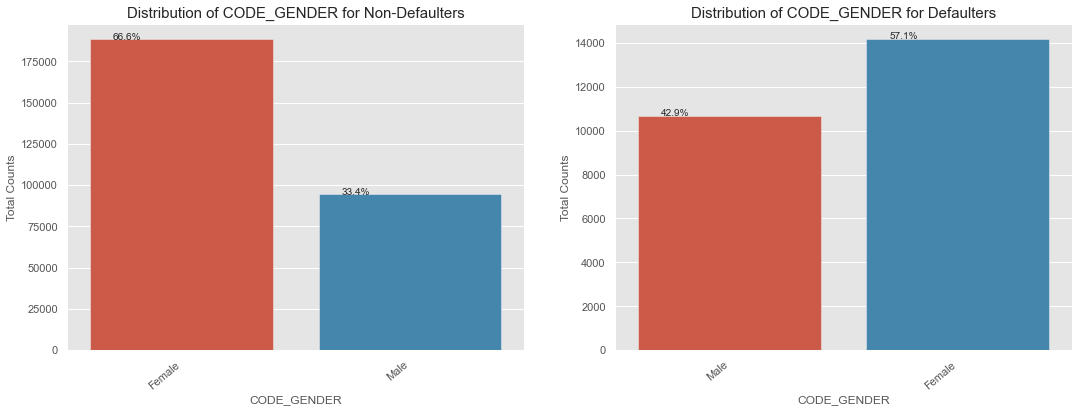

In [109]:
plotmax('CODE_GENDER')

In [110]:
#here we can see, in Non-Defaulters Female are more contributing in orange part as compare to Male on 33.4%.
#& talking about Defaulters, also Female percantage is high as they are preferring loan more than Male.
#But the rate of Defaulting of FEMALE is much lower compared to Male.

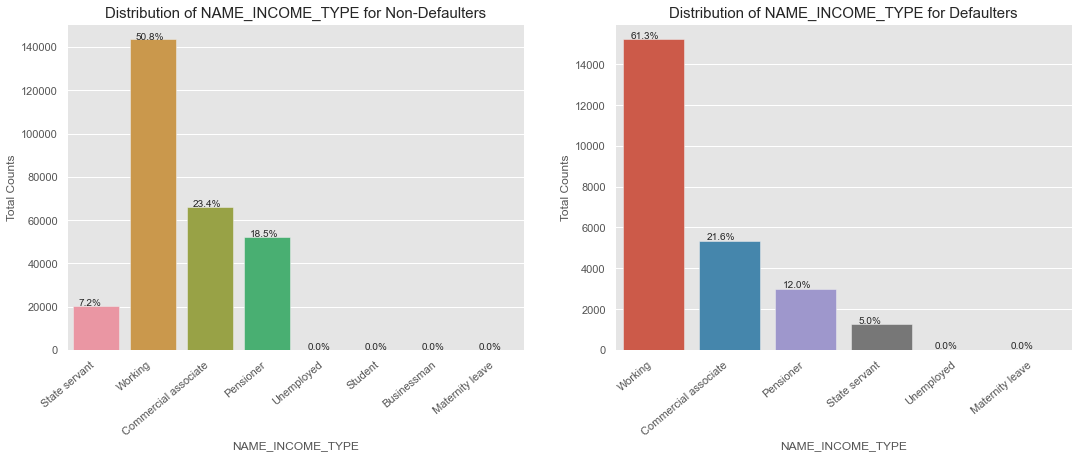

In [111]:
plotmax('NAME_INCOME_TYPE')

In [112]:
# here we can see, students & businessman are not showing defaulters.
#mostly loan is distributed to working class people.


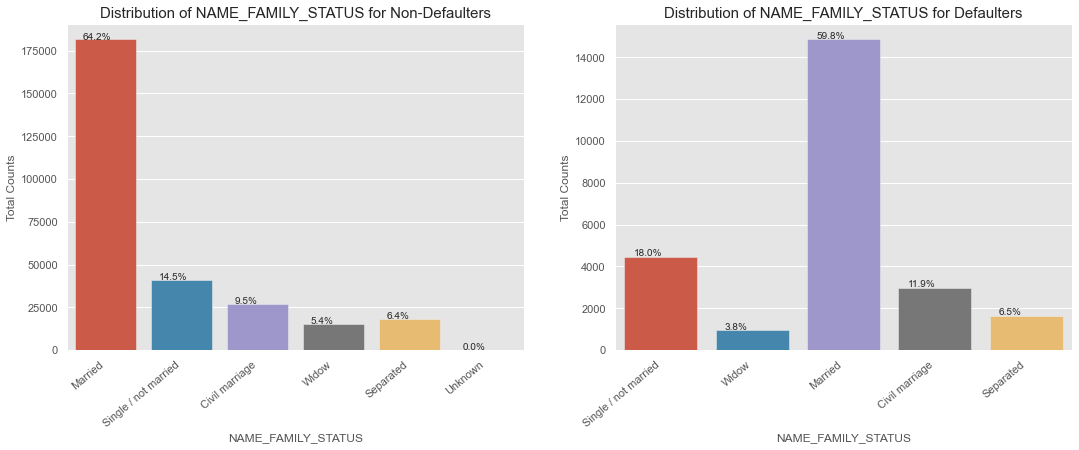

In [113]:
plotmax('NAME_FAMILY_STATUS')

In [114]:
#Married people apply for more loans comparatively.
#But from the graph we see that Single/not Married people contribute 14.5% to Non Defaulters and 18% to the defaulters.

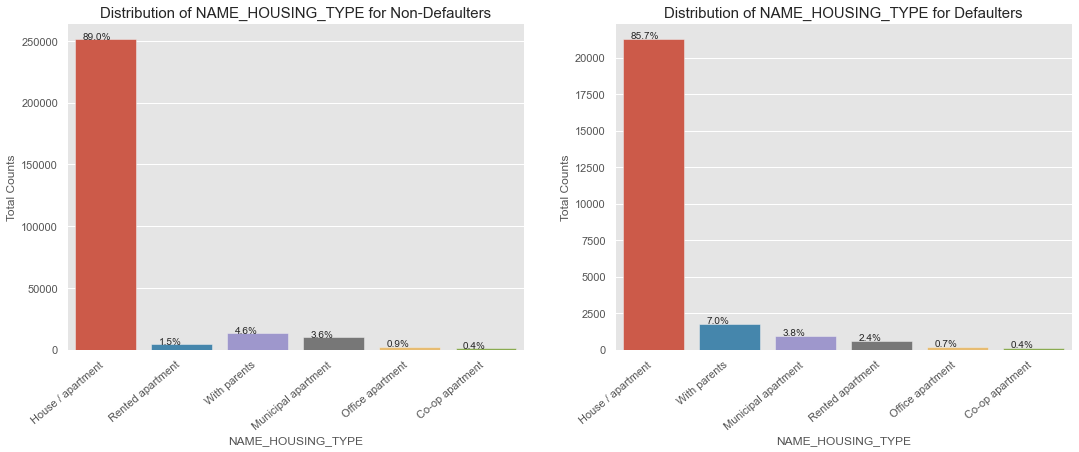

In [115]:
plotmax('NAME_HOUSING_TYPE')

In [116]:
##NOW For Previous Application Data

In [117]:
#read dataset Previous_application

In [118]:
ds2=pd.read_csv(r'C:\Users\Dell\Downloads\previous_application.csv')
ds2

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [119]:
ds2.shape

(1670214, 37)

In [120]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [121]:
y=len(ds2)//2
y

835107

In [122]:
#to delete coloumns containg more than 50% Null value
ds2.columns[ds2.isnull().sum() < y]

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [123]:
len(ds2.columns[ds2.isnull().sum() < y])

33

In [124]:
ds2=ds2[ds2.columns[ds2.isnull().sum() < y]]
ds2.shape

(1670214, 33)

In [125]:
#5 columns droped as they contains value of more than 50% as we can see in below info.

In [126]:
rep_null1=ds2.isnull().sum()/len(ds2)*100
rep_null1

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [127]:
ds2['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

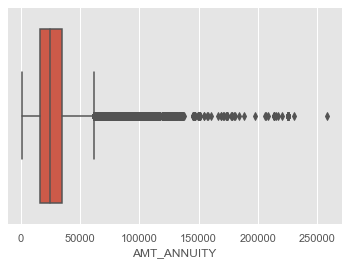

In [128]:
##to check outliers in AMT_ANNUITY Column.
sns.boxplot(ds1['AMT_ANNUITY'])
plt.show()

In [129]:
rep_null1=ds2['AMT_ANNUITY'].median()

ds2.loc[ds2['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=rep_null1

In [130]:
rep_null1

11250.0

In [131]:
###Univariate analysis

In [132]:
# taking function to count plot for categorical variables
def plotmax2(var):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(12,4))
    
    sns.countplot(x=var, data=ds2,ax=ax,hue='NAME_CONTRACT_TYPE')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Bar Plotof {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

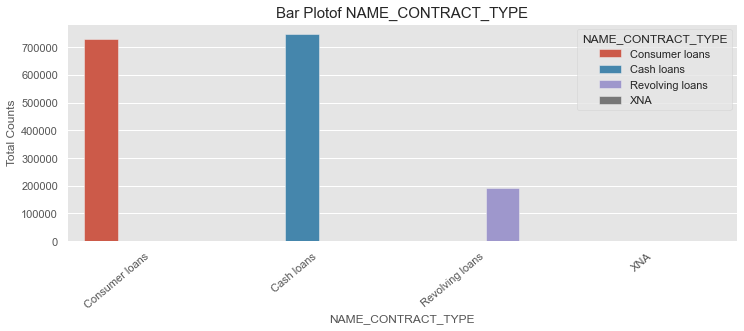

In [133]:
plotmax2('NAME_CONTRACT_TYPE')

In [134]:
###By using BOX Plot method(Bivariate analysis)

In [147]:
def plotmax22(inp0, inp1):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=inp0,y =inp1, data=ds2)
    ax.set_ylabel(f'{inp1}')
    ax.set_xlabel(f'{inp0}')

    ax.set_title(f'{inp0} Vs {inp1}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

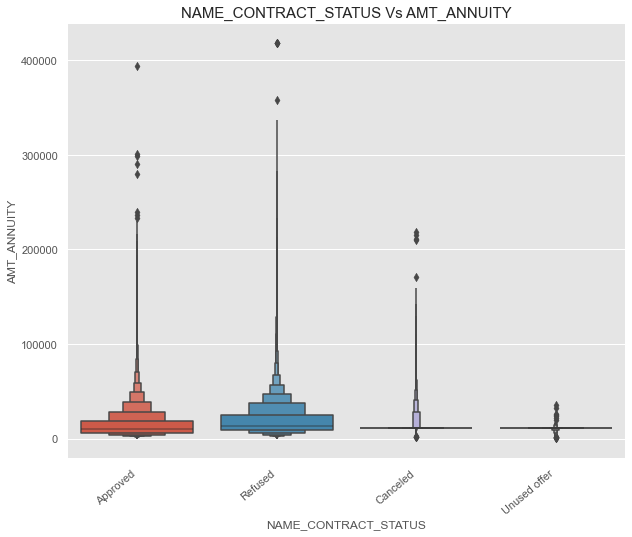

In [148]:
plotmax22('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')


In [137]:
##From the above plot we can see that loan application for people with lower AMT_ANNUITY gets canceled or Unused most of the time.
##we also see that applications with too high AMT ANNUITY also got refused more often than others.

In [138]:
###Merging Files for analyzing

In [139]:
merge1 = pd.merge(ds1, ds2, how='left', on=['SK_ID_CURR'])

In [140]:
merge1.shape

(1430100, 114)

In [141]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430100 entries, 0 to 1430099
Columns: 114 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(43), int64(42), object(29)
memory usage: 1.2+ GB


In [142]:
##now by taking reference using def function for merging both Data for easily understanding.

In [143]:
def combo_plotmax(Varx,Vary):
    plt.style.use('ggplot')
    sns.despine
    Fresh1 = merge1.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    Fresh1=Fresh1.div(Fresh1.sum(axis=1),axis='rows')*100
    sns.set()
    Fresh1.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

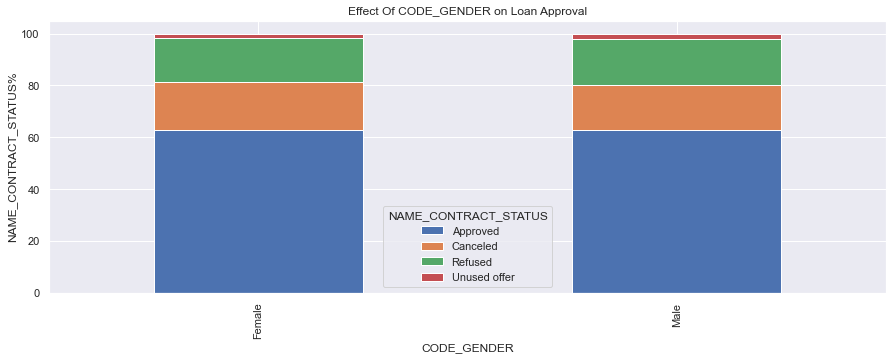

In [144]:
combo_plotmax('CODE_GENDER','NAME_CONTRACT_STATUS')

In [152]:
##We see that code gender doesn't have any effect on application approval or rejection.
##But we saw earlier that female have lesser chances of default compared to males. The bank can add more weightage to female while approving a loan amount.

In [158]:
###FinallyChecking Co-relation for Previous dataset

In [145]:
#Getting the top 10 correlation PreviousApplication
corr=ds2.corr()
corr_ds = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_ds.columns=['Line1','Line2','Correlation']
corr_ds.dropna(subset=['Correlation'],inplace=True)
corr_ds['Abs_Correlation']=corr_ds['Correlation'].abs()
corr_ds = corr_ds.sort_values(by=['Abs_Correlation'], ascending=False)
corr_ds.head(10)

,Line1,Line2,Correlation,Abs_Correlation
88,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
89,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
71,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990,0.927990
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.820474,0.820474
70,AMT_CREDIT,AMT_ANNUITY,0.811670,0.811670
53,AMT_APPLICATION,AMT_ANNUITY,0.805558,0.805558
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803494,0.803494
173,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
174,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278
